In [1]:
using DSP
using Gadfly
using PyCall
@pyimport numpy.linalg as linalg

ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_weekly_mlo.txt

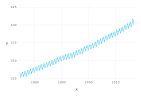

In [48]:
Y = readdlm("CO2.txt")[:,1] # CO2 concentration (ppm)
time = linspace(1974.38, 2016.753, length(Y)) # Year (decimal) 

plot(layer(x=time, y=Y, Geom.line), Coord.Cartesian(xmin=minimum(time),xmax=maximum(time))) # TODO: xmin, xmax, legend

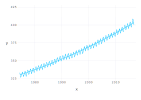

In [9]:
A = hcat(time.^2, time, ones(length(time)))
coeffs = linalg.lstsq(A, Y)[1]
T = coeffs[1]*(time.^2) + coeffs[2]*time + coeffs[3]

plot(layer(x=time, y=Y, Geom.line), layer(x=time, y=T, Geom.line), Coord.Cartesian(xmin=minimum(time),xmax=maximum(time))) # TODO: xmin, xmax, legend

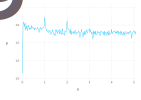

In [10]:
p = periodogram(Y-T, fs=52)
plot(layer(x=p.freq, y=p.power, Geom.line), Scale.y_log10, Coord.Cartesian(xmin=0,xmax=5))

$$S(t) = \beta_1 cos(2\pi\omega_1 t) + \beta_2 sin(2\pi\omega_1 t) + \beta_3 cos(2\pi\omega_2 t) + \beta_4 sin(2\pi\omega_2 t)$$

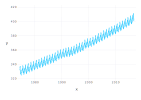

In [12]:
w1 = 1
w2 = 2

a1 = cos(2*pi*w1*time)
a2 = sin(2*pi*w1*time)
a3 = cos(2*pi*w2*time)
a4 = sin(2*pi*w2*time)

A = hcat(a1, a2, a3, a4)
coeffs = linalg.lstsq(A, T)[1]

S = coeffs[1]*a1 + coeffs[2]*a2 + coeffs[3]*a3 + coeffs[4]*a4
plot(layer(x=time, y=Y, Geom.line), layer(x=time, y=Y+S, Geom.line), Coord.Cartesian(xmin=minimum(time),xmax=maximum(time)))

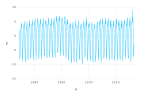

In [13]:
Z = Y-T-S
plot(layer(x=time, y=Z, Geom.line), Coord.Cartesian(xmin=minimum(time),xmax=maximum(time)))

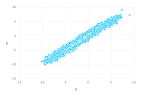

In [47]:
Z1 = Z[2:length(Z)]   # Z(t)
Z2 = Z[1:length(Z)-1] # Z(t-1)

plot(layer(x=Z1, y=Z2, Geom.point), layer(x=[-3 4], y=[-3 4], Geom.line))

### 